<a href="https://colab.research.google.com/github/rvsvhy/Machine-Learning/blob/main/Machine_Learning_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Question 1

import pandas as pd
import numpy as np

# -------------------- MODULE 1: Load Data and Create Matrices --------------------

def load_purchase_data(file_path: str, sheet_name: str):
    """
    Loads the Excel sheet and returns matrices A and C.
    A = [Candies, Mangoes, Milk Packets] as features
    C = [Payment]
    """
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    A = df.iloc[:, 1:4].values.astype(float)  # Feature matrix
    C = df["Payment (Rs)"].values.reshape(-1, 1).astype(float)  # Target vector (as column matrix)
    return A, C, df


# -------------------- MODULE 2: Compute Vector Space Properties --------------------

def get_vector_space_properties(matrix_A):
    """
    Computes:
    - Dimensionality of vector space (number of columns of A)
    - Number of vectors (number of rows in A)
    - Rank of matrix A
    """
    dimension = matrix_A.shape[1]  # number of columns
    num_vectors = matrix_A.shape[0]  # number of rows
    rank = np.linalg.matrix_rank(matrix_A)
    return dimension, num_vectors, rank


# -------------------- MODULE 3: Estimate Product Costs using Pseudo-Inverse --------------------

def compute_product_costs(matrix_A, matrix_C):
    """
    Computes the estimated product cost vector X using pseudo-inverse.
    Solves AX = C => X = (A^+)*C
    Returns vector X (costs of Candies, Mangoes, Milk Packets)
    """
    pseudo_inverse_A = np.linalg.pinv(matrix_A)
    cost_vector = np.dot(pseudo_inverse_A, matrix_C)
    return cost_vector


# -------------------- MAIN PROGRAM --------------------

def main():
    file_path = "/Lab Session Data.xlsx"
    sheet_name = "Purchase data"

    # Step 1: Load matrices A (features) and C (payment)
    A, C, df = load_purchase_data(file_path, sheet_name)

    # Step 2: Get vector space details
    dimension, num_vectors, rank = get_vector_space_properties(A)

    # Step 3: Estimate cost of each product using pseudo-inverse
    cost_vector = compute_product_costs(A, C)

    # Print results
    print(f"Dimensionality of vector space: {dimension}")
    print(f"Number of vectors in vector space: {num_vectors}")
    print(f"Rank of Matrix A: {rank}")
    print("\nEstimated Cost per Product:")
    print(f"  - Candies      : Rs. {cost_vector[0][0]:.2f}")
    print(f"  - Mangoes (Kg) : Rs. {cost_vector[1][0]:.2f}")
    print(f"  - Milk Packets : Rs. {cost_vector[2][0]:.2f}")


# -------------------- RUN --------------------
if __name__ == "__main__":
    main()


Dimensionality of vector space: 3
Number of vectors in vector space: 10
Rank of Matrix A: 3

Estimated Cost per Product:
  - Candies      : Rs. 1.00
  - Mangoes (Kg) : Rs. 55.00
  - Milk Packets : Rs. 18.00


In [ ]:
# Question 2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def load_customer_data(file_path: str, sheetname: str):
  df = pd.read_excel(file_path, sheet_name=sheet_name)
  features = df.iloc[:, 1:4].values.astype(float)
  labels = (df["Payment (Rs)"] > 200).astype(int).values

  return features, labels, df

def train_classifier(features, labels):
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)
  model = LogisticRegression()

  model.fit(train_features, train_labels)

  predictions = model.predict(test_features)

  return model, test_features, test_labels, predictions

def classify_customers(model, features, original_df):
  predictions_all = model.predict(features)
  original_df["Customer Type"] = np.where(predictions_all == 1, "Rich", "Poor")

  return original_df

if __name__ == "__main__":
  excel_file = "/Lab Session Data.xlsx"
  sheet_name = "Purchase data"

  feature_matrix, target_labels, df_data = load_customer_data(excel_file, sheet_name)

  model, X_test, y_test, y_pred = train_classifier(feature_matrix, target_labels)

  accuracy = accuracy_score(y_test, y_pred)
  class_report = classification_report(y_test, y_pred, target_names=["Poor","Rich"])

  df_result = classify_customers(model, feature_matrix, df_data)

  print(f"Accuracy on test set: {accuracy:.2f}")
  print("\nClassification Report:\n", class_report)
  print("\nCustomer Classification:\n", df_result[["Customer", "Payment (Rs)", "Customer Type"]])

Accuracy on test set: 0.67

Classification Report:
               precision    recall  f1-score   support

        Poor       0.67      1.00      0.80         2
        Rich       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Customer Classification:
   Customer  Payment (Rs) Customer Type
0      C_1           386          Rich
1      C_2           289          Poor
2      C_3           393          Rich
3      C_4           110          Poor
4      C_5           280          Rich
5      C_6           167          Poor
6      C_7           271          Rich
7      C_8           274          Rich
8      C_9           148          Poor
9     C_10           198          Poor


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Population Mean (Price): 1560.663453815261
Population Variance (Price): 58732.365352539186
Sample Mean (Wednesday): 1550.706
Sample Mean (April): 1698.9526315789474
Probability of Loss (Chg% < 0): 0.4979919678714859
Probability of Profit on Wednesday: 0.42
Conditional Probability of Profit given Wednesday: 0.42


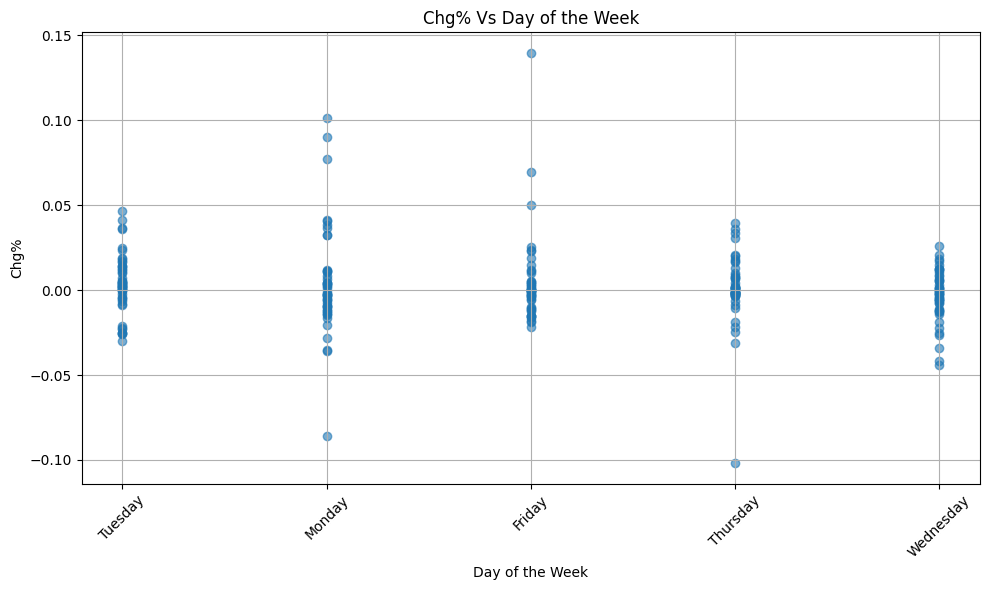

In [ ]:
#Question 3

import pandas as pd
import statistics
import matplotlib.pyplot as plt

def load_irctc_data(filepath, sheet_name="IRCTC Stock Price"):
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    df = df.dropna(subset=["Date", "Price", "Chg%"])
    df["Date"] = pd.to_datetime(df["Date"])
    df["Weekday"] = df["Date"].dt.day_name()
    return df

def compute_population_stats(price_series):
    mean_val = statistics.mean(price_series)
    variance_val = statistics.variance(price_series)
    return mean_val, variance_val

def compute_sample_mean(df, column_index, condition):
    filtered_data = df[condition]
    sample_series = filtered_data.iloc[:, column_index].dropna()
    if len(sample_series) == 0:
        raise ValueError("No data points in the filtered sample.")
    return statistics.mean(sample_series)

def compute_loss_probability(chg_series):
    total = len(chg_series)
    losses = sum(map(lambda x: x < 0, chg_series))
    return losses / total if total > 0 else 0

def compute_daywise_profit_probability(df, day, chg_col_index):
    filtered = df[df['Weekday'] == day]
    chg_series = filtered.iloc[:, chg_col_index].dropna()
    if len(chg_series) == 0:
        return 0
    profits = sum(map(lambda x: x > 0, chg_series))
    return profits / len(chg_series)

def plot_chg_vs_day(df, chg_col_index):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Weekday'], df.iloc[:, chg_col_index], alpha=0.6)
    plt.title("Chg% Vs Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Chg%")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Load data
file_path = "/Lab Session Data.xlsx"
stock_df = load_irctc_data(file_path)

# Index values
price_col_index = stock_df.columns.get_loc("Price")
chg_col_index = stock_df.columns.get_loc("Chg%")

# Q3 answers
population_mean, population_variance = compute_population_stats(stock_df.iloc[:, price_col_index].dropna())
wednesday_mean = compute_sample_mean(stock_df, price_col_index, stock_df['Weekday'] == 'Wednesday')
april_mean = compute_sample_mean(stock_df, price_col_index, stock_df['Date'].dt.month == 4)
loss_probability = compute_loss_probability(stock_df.iloc[:, chg_col_index].dropna())
profit_prob_wed = compute_daywise_profit_probability(stock_df, 'Wednesday', chg_col_index)
conditional_prob_profit_given_wed = profit_prob_wed  # Since we already filtered by Wednesday

# Display results
print("Population Mean (Price):", population_mean)
print("Population Variance (Price):", population_variance)
print("Sample Mean (Wednesday):", wednesday_mean)
print("Sample Mean (April):", april_mean)
print("Probability of Loss (Chg% < 0):", loss_probability)
print("Probability of Profit on Wednesday:", profit_prob_wed)
print("Conditional Probability of Profit given Wednesday:", conditional_prob_profit_given_wed)

# Plot
plot_chg_vs_day(stock_df, chg_col_index)



Encoding Scheme Recommendations:
- sex: Nominal - Use One-Hot Encoding
- on thyroxine: Nominal - Use One-Hot Encoding
- query on thyroxine: Nominal - Use One-Hot Encoding
- on antithyroid medication: Nominal - Use One-Hot Encoding
- sick: Nominal - Use One-Hot Encoding
- pregnant: Nominal - Use One-Hot Encoding
- thyroid surgery: Nominal - Use One-Hot Encoding
- I131 treatment: Nominal - Use One-Hot Encoding
- query hypothyroid: Nominal - Use One-Hot Encoding
- query hyperthyroid: Nominal - Use One-Hot Encoding
- lithium: Nominal - Use One-Hot Encoding
- goitre: Nominal - Use One-Hot Encoding
- tumor: Nominal - Use One-Hot Encoding
- hypopituitary: Nominal - Use One-Hot Encoding
- psych: Nominal - Use One-Hot Encoding
- TSH measured: Nominal - Use One-Hot Encoding
- TSH: Possibly Ordinal - Use Label Encoding
- T3 measured: Nominal - Use One-Hot Encoding
- T3: Possibly Ordinal - Use Label Encoding
- TT4 measured: Nominal - Use One-Hot Encoding
- TT4: Possibly Ordinal - Use Label Encodi

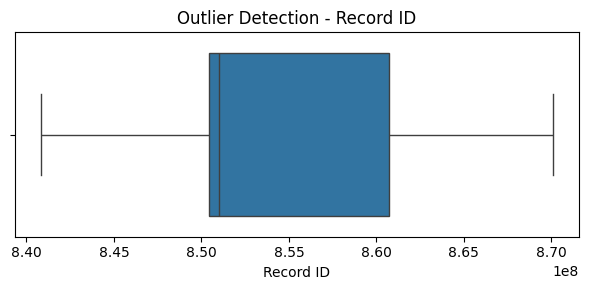

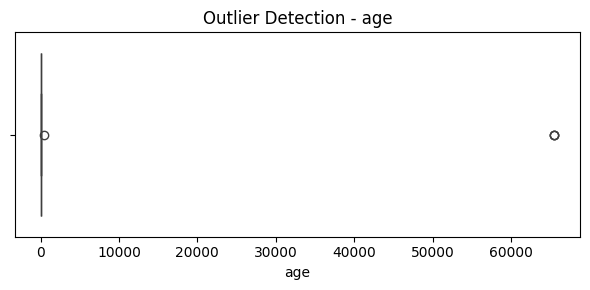


Mean and Variance of Numeric Columns:
                   mean           var
Record ID  8.529473e+08  5.748625e+13
age        7.355582e+01  1.401801e+06


In [2]:
#Question 4
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def load_data(file_path, sheet_name):
    """Load the specified Excel sheet."""
    return pd.read_excel(file_path, sheet_name=sheet_name)


def identify_encoding_schemes(df):
    """Identify encoding schemes based on datatype."""
    encoding_scheme = {}
    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].nunique()
            if unique_values < 10:
                encoding_scheme[column] = "Nominal - Use One-Hot Encoding"
            else:
                encoding_scheme[column] = "Possibly Ordinal - Use Label Encoding"
    return encoding_scheme

def numerical_summary(df):
    """Return summary statistics for numeric columns."""
    return df.describe().T[['min', 'max', 'mean', 'std']]

def check_missing_values(df):
    """Check for missing values in the dataset."""
    return df.isnull().sum()

def detect_outliers(df):
    """Visualize outliers for numerical columns using boxplots."""
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=df[col])
        plt.title(f'Outlier Detection - {col}')
        plt.tight_layout()
        plt.show()

def calculate_mean_variance(df):
    """Calculate mean and variance of numeric columns."""
    numeric_cols = df.select_dtypes(include=['int64', 'float64'])
    return numeric_cols.agg(['mean', 'var']).T

# ---------- MAIN PROGRAM ---------- #

# Set file path and sheet name
file_path = "/content/Lab Session Data.xlsx"
sheet_name = "thyroid0387_UCI"

# Load data
thyroid_df = load_data(file_path, sheet_name)

# Identify encoding schemes
encoding_recommendations = identify_encoding_schemes(thyroid_df)
print("\nEncoding Scheme Recommendations:")
for col, scheme in encoding_recommendations.items():
    print(f"- {col}: {scheme}")

# Summarize numeric data
print("\nNumerical Summary (min, max, mean, std):")
print(numerical_summary(thyroid_df))

# Check missing values
print("\nMissing Values:")
print(check_missing_values(thyroid_df))

# Outlier detection plots
print("\nOutlier Detection (Box Plots):")
detect_outliers(thyroid_df)

# Mean and Variance
print("\nMean and Variance of Numeric Columns:")
print(calculate_mean_variance(thyroid_df))


In [9]:
import pandas as pd
import numpy as np

# -------------------------------
# Load the thyroid dataset
# -------------------------------
def load_thyroid(filepath):
    return pd.read_excel(filepath, sheet_name="thyroid0387_UCI")

# -------------------------------
# Extract binary columns (0/1 or t/f)
# -------------------------------
def extract_binary_columns(df):
    bin_df = pd.DataFrame()

    for col in df.columns:
        unique_vals = set(df[col].dropna().unique())

        # ✅ Case 1: already numeric 0/1
        if pd.api.types.is_numeric_dtype(df[col]):
            if unique_vals.issubset({0,1}):
                bin_df[col] = df[col]

        # ✅ Case 2: text columns with only t/f or T/F
        if unique_vals.issubset({'t','f','T','F'}):
            bin_df[col] = df[col].map({'t':1, 'f':0, 'T':1, 'F':0})

    return bin_df

# -------------------------------
# Compute Jaccard and SMC
# -------------------------------
def jaccard_smc(bin_df):
    if bin_df.shape[1] == 0:
        print("⚠️ No binary columns found.")
        return 0.0, 0.0

    v1 = bin_df.iloc[0].values
    v2 = bin_df.iloc[1].values

    # Count matches/mismatches
    f11 = np.sum((v1==1)&(v2==1))
    f00 = np.sum((v1==0)&(v2==0))
    f10 = np.sum((v1==1)&(v2==0))
    f01 = np.sum((v1==0)&(v2==1))

    # Avoid division by zero
    jc = f11 / (f11+f10+f01) if (f11+f10+f01)!=0 else 0.0
    smc = (f11+f00) / (f11+f00+f10+f01) if (f11+f00+f10+f01)!=0 else 0.0

    return jc, smc

# -------------------------------
# MAIN
# -------------------------------
if __name__ == "__main__":
    # Load dataset
    thyroid_df = load_thyroid("Lab Session Data.xlsx")

    # Extract binary columns (including t/f)
    bin_df = extract_binary_columns(thyroid_df)
    print("✅ Binary columns found:", bin_df.columns.tolist())

    # Compute Jaccard and SMC
    jc, smc = jaccard_smc(bin_df)
    print("A5 Jaccard:", jc)
    print("A5 SMC:", smc)


✅ Binary columns found: ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']
A5 Jaccard: 0.25
A5 SMC: 0.85


In [10]:
# Question 6

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def load_thyroid(filepath):
    return pd.read_excel(filepath, sheet_name="thyroid0387_UCI")

def cosine_two_vectors(df):
    # take only numeric data, fill missing with 0
    num_df = df.select_dtypes(include=['number']).fillna(0)
    v1 = num_df.iloc[0].values.reshape(1, -1)
    v2 = num_df.iloc[1].values.reshape(1, -1)
    return cosine_similarity(v1, v2)[0][0]

# MAIN
if __name__ == "__main__":
    df = load_thyroid("Lab Session Data.xlsx")
    cos = cosine_two_vectors(df)
    print("A6 Cosine Similarity:", cos)


A6 Cosine Similarity: 0.9999999999999999


A7 SMC matrix shape: (20, 20)


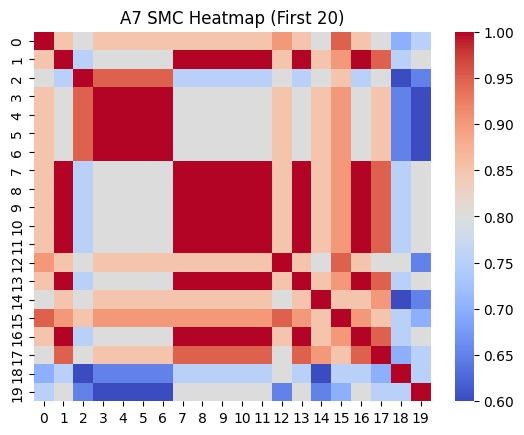

In [12]:
#Question 7

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_thyroid(filepath):
    return pd.read_excel(filepath, sheet_name="thyroid0387_UCI")

def extract_binary_columns(df):
    bin_df = pd.DataFrame()
    for col in df.columns:
        unique_vals = set(df[col].dropna().unique())
        # numeric 0/1
        if pd.api.types.is_numeric_dtype(df[col]):
            if unique_vals.issubset({0,1}):
                bin_df[col] = df[col]
        # t/f strings
        if unique_vals.issubset({'t','f','T','F'}):
            bin_df[col] = df[col].map({'t':1, 'f':0, 'T':1, 'F':0})
    return bin_df

def compute_smc_matrix(bin_df, n=20):
    # Take first n rows of binary data
    data = bin_df.iloc[:n].fillna(0).values
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            vi = data[i]
            vj = data[j]
            f11 = np.sum((vi==1)&(vj==1))
            f00 = np.sum((vi==0)&(vj==0))
            f10 = np.sum((vi==1)&(vj==0))
            f01 = np.sum((vi==0)&(vj==1))
            denom = (f11+f00+f10+f01)
            mat[i,j] = (f11+f00)/denom if denom != 0 else 0
    return mat

def plot_heatmap(matrix, title="SMC Heatmap"):
    sns.heatmap(matrix, annot=False, cmap='coolwarm')
    plt.title(title)
    plt.show()

# MAIN
if __name__ == "__main__":
    df = load_thyroid("Lab Session Data.xlsx")
    bin_df = extract_binary_columns(df)
    if bin_df.shape[1] == 0:
        print("⚠️ No binary columns found in dataset.")
    else:
        smc_matrix = compute_smc_matrix(bin_df, n=20)
        print("A7 SMC matrix shape:", smc_matrix.shape)
        plot_heatmap(smc_matrix, title="A7 SMC Heatmap (First 20)")


In [17]:
#Question 8

import pandas as pd
import numpy as np

# Load the dataset and replace "?" with NaN

def load_thyroid(filepath):
    df = pd.read_excel(filepath, sheet_name="thyroid0387_UCI")
    # Replace "?" with np.nan
    df = df.replace("?", np.nan)
    return df

# Imputation logic

def impute_data(df):
    df_imputed = df.copy()

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            series = df[col].dropna()
            if series.empty:
                continue

            mean = series.mean()
            std = series.std()
            # detect outliers beyond 3 std deviations
            outliers = ((series < mean - 3 * std) | (series > mean + 3 * std)).sum()

            # choose mean or median
            if outliers / len(series) > 0.05:
                fill_val = series.median()
            else:
                fill_val = mean

            df_imputed[col] = df[col].fillna(fill_val)
        else:
            # categorical column: use mode
            if df[col].mode().empty:
                continue
            fill_val = df[col].mode()[0]
            df_imputed[col] = df[col].fillna(fill_val)

    return df_imputed

# MAIN

if __name__ == "__main__":
    filepath = "Lab Session Data.xlsx"
    df = load_thyroid(filepath)

    # show missing value counts before imputation
    print("Before imputation:\n", df.isna().sum())

    # perform imputation
    imputed_df = impute_data(df)

    # show missing value counts after imputation
    print("After imputation:\n", imputed_df.isna().sum())


Before imputation:
 Record ID                       0
age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                         

/tmp/ipython-input-17-2066528570.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("?", np.nan)


In [18]:
#Question 9

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset and handle missing placeholders

def load_thyroid(filepath):
    df = pd.read_excel(filepath, sheet_name="thyroid0387_UCI")
    # Replace "?" with NaN
    df = df.replace("?", np.nan)
    return df

# Normalize numeric columns

def normalize_numeric(df):
    # select numeric columns only
    num_df = df.select_dtypes(include=['number'])
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(num_df.fillna(0))  # fill NaN with 0 temporarily
    # create a new dataframe for normalized values
    scaled_df = pd.DataFrame(scaled_array, columns=num_df.columns)
    return scaled_df

# MAIN
if __name__ == "__main__":
    filepath = "Lab Session Data.xlsx"
    df = load_thyroid(filepath)

    # Apply normalization
    normalized_df = normalize_numeric(df)

    # Show first few rows of normalized data
    print("A9 Normalized Data (first 5 rows):\n", normalized_df.head())

    print("\nMeans after normalization (should be ~0):\n", normalized_df.mean())
    print("\nStandard deviations after normalization (should be ~1):\n", normalized_df.std())


A9 Normalized Data (first 5 rows):
    Record ID       age       TSH       T3       TT4       T4U       FTI  \
0  -1.602090 -0.037634 -0.192221 -1.21293 -2.384962 -2.644943 -2.031513   
1  -1.602090 -0.037634 -0.135932  0.42018  0.565639 -2.644943 -2.031513   
2  -1.602086 -0.027499 -0.205211 -1.21293 -2.384962 -2.644943 -2.031513   
3  -1.601822 -0.031722 -0.205211 -1.21293 -2.384962 -2.644943 -2.031513   
4  -1.601822 -0.035100 -0.205211 -1.21293 -2.384962 -2.644943 -2.031513   

        TBG  
0 -0.161515  
1 -0.161515  
2  1.401665  
3  3.533274  
4  4.954347  

Means after normalization (should be ~0):
 Record ID    6.395814e-15
age          7.746868e-18
TSH          1.549374e-18
T3           1.239499e-17
TT4          3.641028e-17
T4U          4.373107e-16
FTI         -1.471905e-16
TBG          3.950903e-17
dtype: float64

Standard deviations after normalization (should be ~1):
 Record ID    1.000055
age          1.000055
TSH          1.000055
T3           1.000055
TT4          1.0

/tmp/ipython-input-18-1893223151.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("?", np.nan)
